In [26]:
from google.colab import files
uploaded = files.upload()
import io
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

Saving Train.csv to Train (1).csv


In [48]:
# Load the data
data = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [31]:
plt.figure(figsize=(18, 10))

num_features = data.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(data[num], color=pal[i])
    
plt.show()data.isnull().sum() 
#check if we have any null values in data set

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

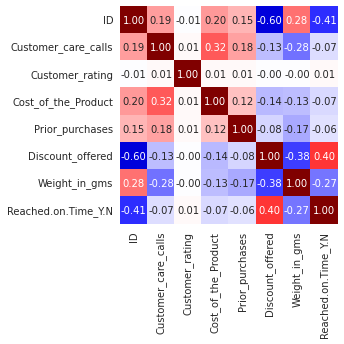

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [49]:
#Plot the correlation 
plt.figure(figsize=(4, 4))
sns.heatmap(data[data.select_dtypes('number').columns].corr(),
            square=True, cmap='seismic', cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()
data.corr()

In [50]:
#As the correlation heatmap showed, we should drop the ID attribute  
data = data.drop('ID', axis=1)
data 

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


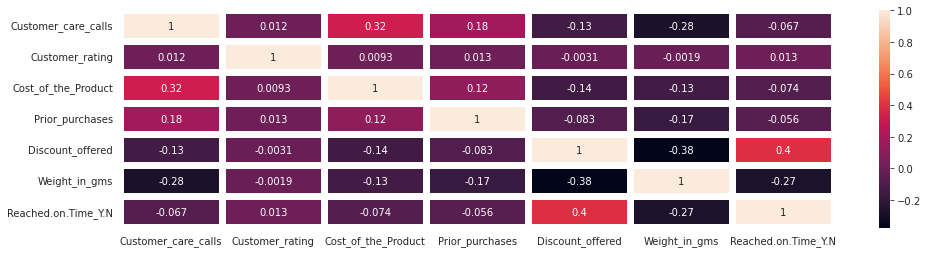

In [54]:
#After drop ID we check correlation again
plt.figure(figsize=(16, 4))
sns.heatmap(data.corr(), annot=True, linewidth=6, linecolor='white')

###Discount_offered have high positive correlation with Reached on Time or not of 40%
###Discount_Offered and weight_in_grams have negative correlation -38%
###Weights_in_gram have negative correlation with Reached.on.Time_Y.N -27%
### => The subset we should focus on "Reached.on.Time_Y.N", so we analyze the column with high correlation with that column 

In [43]:
#check non-delayed deliveries
data[data['Reached.on.Time_Y.N'] == 0].describe().T


,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,4436.0,4.147656,1.162771,2.0,3.0,4.0,5.0,7.0
Customer_rating,4436.0,2.967989,1.414808,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,4436.0,214.498647,47.757432,97.0,174.0,222.0,254.0,310.0
Prior_purchases,4436.0,3.670424,1.525444,2.0,3.0,3.0,4.0,10.0
Discount_offered,4436.0,5.545987,2.877727,1.0,3.0,6.0,8.0,10.0
Weight_in_gms,4436.0,4168.668395,1573.954178,1001.0,4043.5,4674.0,5337.0,6000.0
Reached.on.Time_Y.N,4436.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
#check delayed deliveries
data[data['Reached.on.Time_Y.N'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,6563.0,3.991467,1.122592,2.0,3.0,4.0,5.0,7.0
Customer_rating,6563.0,3.005790,1.412692,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,6563.0,207.289197,48.054876,96.0,167.0,209.0,249.0,310.0
Prior_purchases,6563.0,3.498095,1.517285,2.0,3.0,3.0,4.0,10.0
Discount_offered,6563.0,18.663721,19.108797,1.0,5.0,9.0,32.0,65.0
Weight_in_gms,6563.0,3272.640104,1576.148391,1001.0,1735.5,3231.0,4696.5,7846.0
Reached.on.Time_Y.N,6563.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


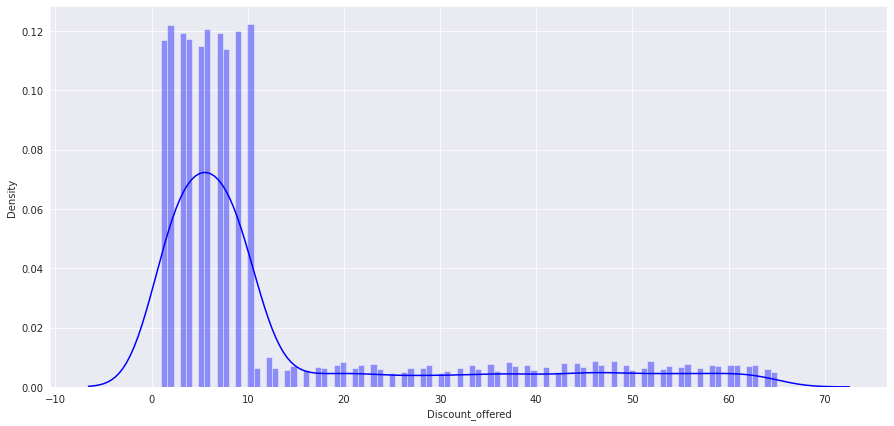

In [68]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(data['Discount_offered'],bins=100, color = 'blue')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


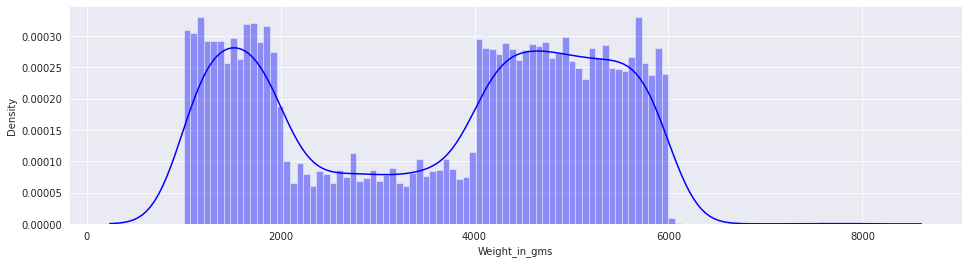

In [67]:
plt.figure(figsize = (16, 4))
ax = sns.distplot(data['Weight_in_gms'], bins = 100, color = 'blue')

plt.show()

#Vizualizing the data

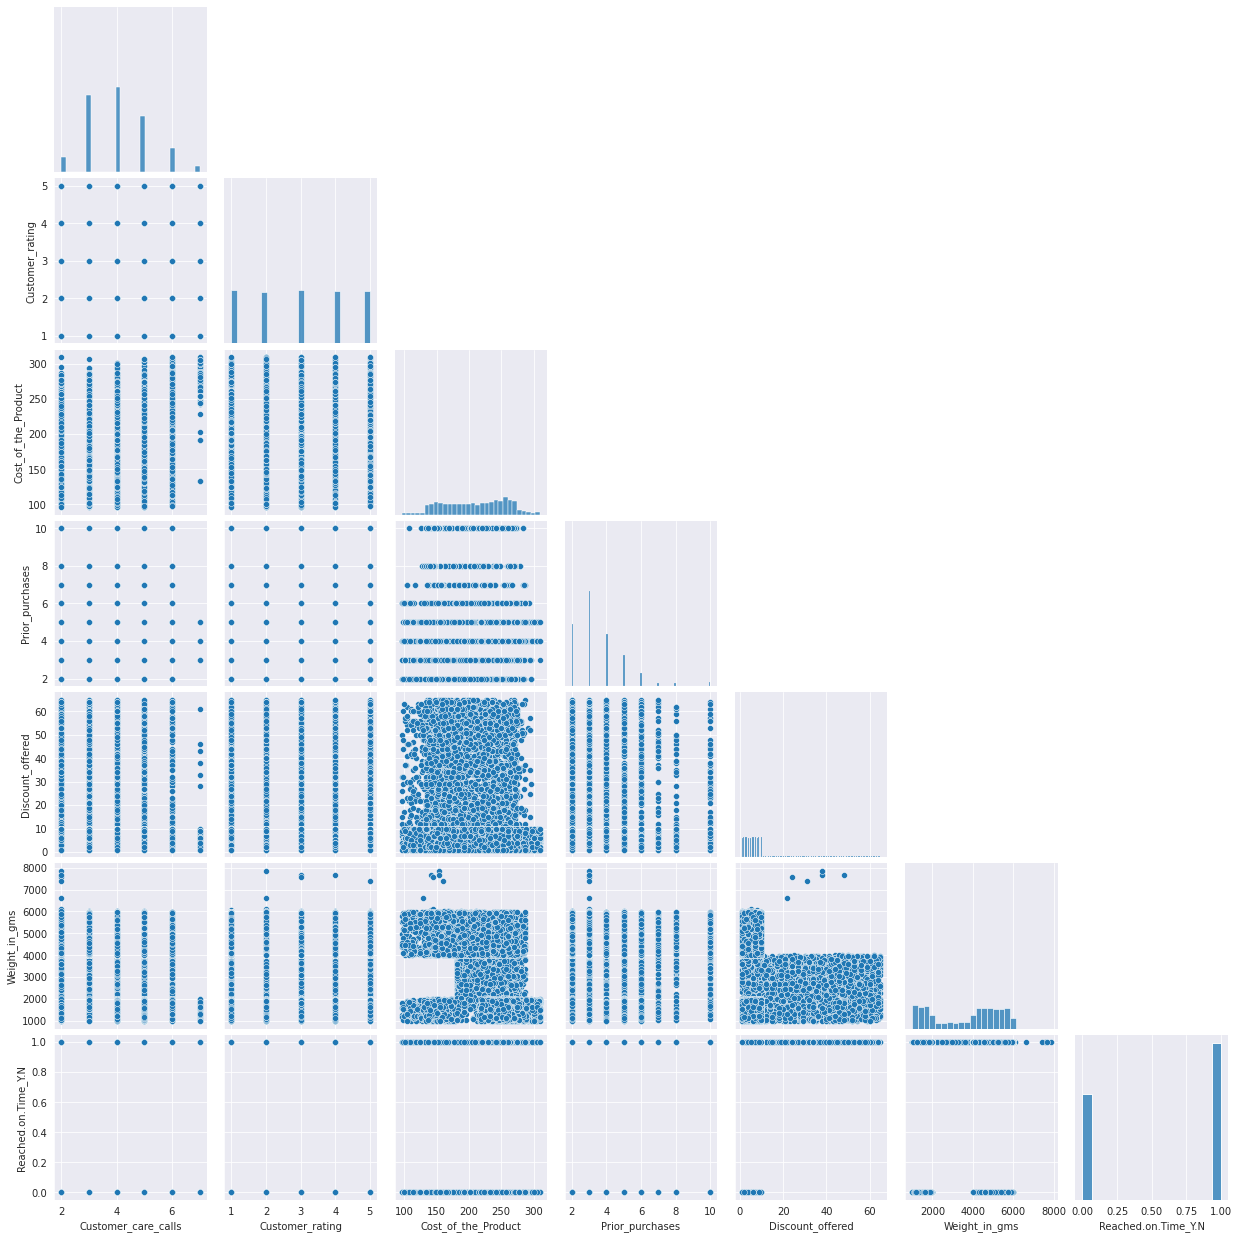

In [45]:
sns.pairplot(data, corner=True)

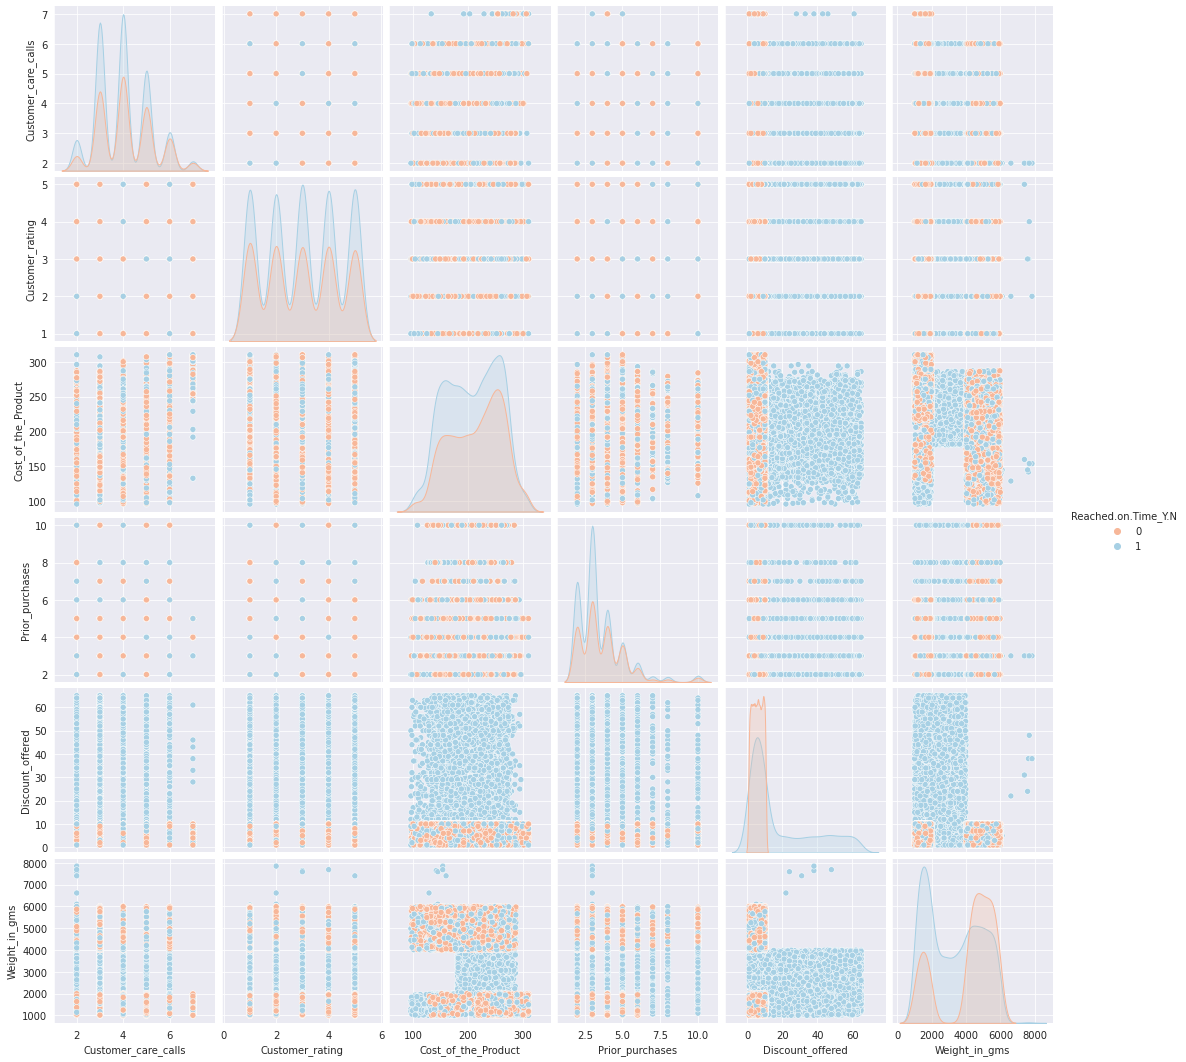

In [143]:
sns.pairplot(data=data, hue = "Reached.on.Time_Y.N", palette = "RdBu")

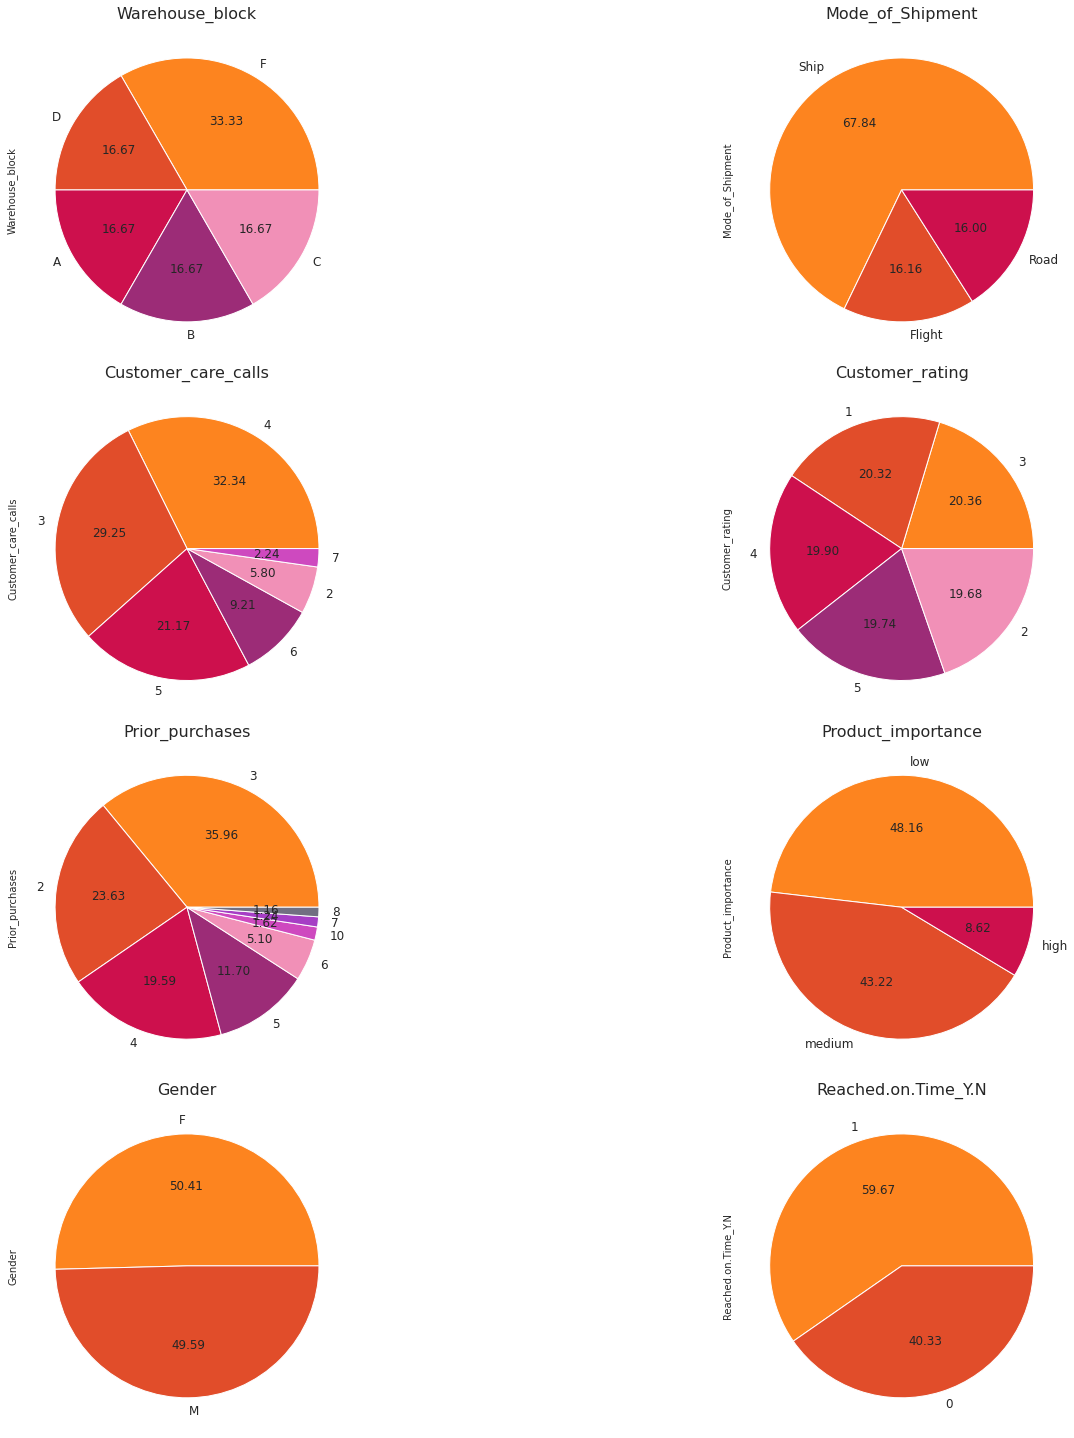

In [129]:
color = ['#FD841F','#E14D2A','#CD104D','#9C2C77',
'#F190B7','#CE49BF','#A63EC5','#716F81',
'#B97A95','#F6AE99','#999B84','#D8AC9C',
'#D789D7','#9D65C9','#5D54A4']
columne = ['Warehouse_block',
'Mode_of_Shipment',
'Customer_care_calls',
'Customer_rating',
'Prior_purchases',
'Product_importance',
'Gender',
'Reached.on.Time_Y.N']

plt.figure(figsize=(20,40))
for i, col in enumerate(columne):
    axes = plt.subplot(8, 2, i + 1)
    data[col].value_counts().plot.pie(autopct='%.2f', textprops={'fontsize':12}, colors=color)
    plt.title(col, fontsize=16)
plt.tight_layout()
plt.show()

## -Categorical

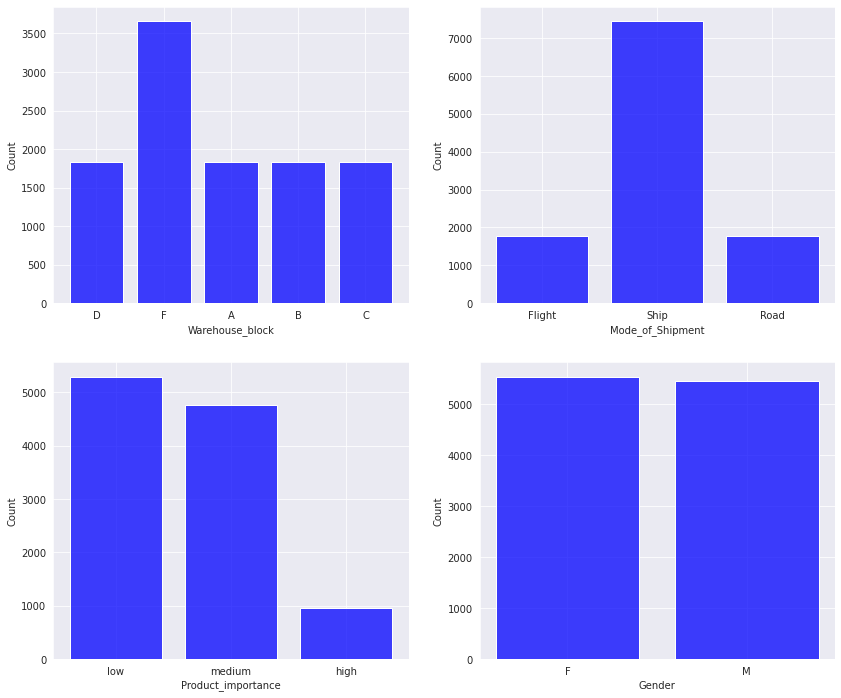

In [78]:
plt.figure(figsize=(14, 12))

cat_features = data.select_dtypes('object').columns.values

for i, cat in enumerate(cat_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(data[cat], shrink=0.8, color="blue")
    
plt.show()

###Warehouse: Blocks A, B, C, D are equilibrated while block F is greatly higher than the others
###Shipment: Flight and Road have similar observations while Ship is higher than both of them. 
###Importance: There is a majority of low and medium importances and a minority of high importances.
###Genders: Both classes are equal.

## -Numerical

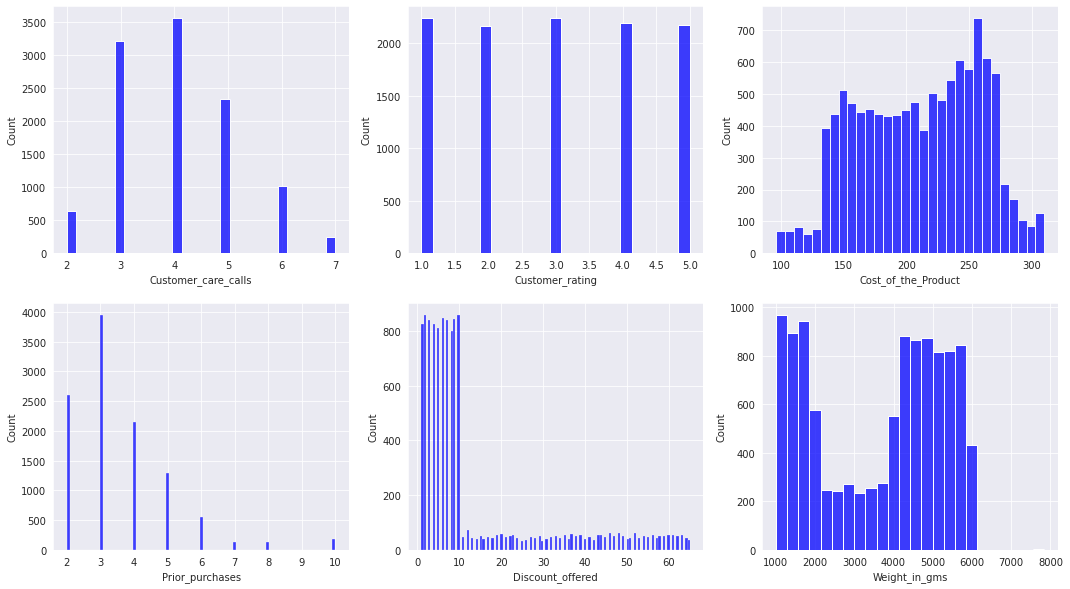

In [80]:
plt.figure(figsize=(18, 10))

num_features = data.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(data[num], color="blue")
    
plt.show()

In [92]:
dfs=[]
cols = data.columns.drop(['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N'])

# columns to split into bins
cols2 = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']


target_col = data.columns[-1]


In [94]:
for i in cols:

    df = pd.DataFrame(data.groupby(i)[target_col].mean())
    df['value_count'] = data.groupby(i)[target_col].count()
    df['value_count_%_of_total'] = (data.groupby(i)[target_col].count()/len(data))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)

    df = (df.style
        .bar(subset=[df.columns[0]], color='#ECC4C4')
        .bar(subset=['value_count'], color='#B1DFB4')
        .bar(subset=['value_count_%_of_total'], color='#B1DFE8')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))
    
    dfs.append(df)
for i in cols2:

    bins = pd.cut(data[i], 10)

    df = pd.DataFrame(data.groupby(bins)[target_col].mean())
    df['value_count'] = data.groupby(bins)[target_col].count()
    df['value_count_%_of_total'] = (data.groupby(bins)[target_col].count()/len(data))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)
    
    df = (df.style
        .bar(subset=[df.columns[0]], color='#ECC4C4')
        .bar(subset=['value_count'], color='#B1DFB4')
        .bar(subset=['value_count_%_of_total'], color='#B1DFE8')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))

    dfs.append(df)    


#Processcing 

In [82]:
data['Reached.on.Time_Y.N'].mean()

0.5966906082371125

That means the target classes are slightly unbalanced. The "Y" is higher than the "N"

In [95]:
dfs[0]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Warehouse_block,,,
A,58.6%,1833,16.7%
B,60.2%,1833,16.7%
C,59.7%,1833,16.7%
D,59.8%,1834,16.7%
F,59.8%,3666,33.3%


In [96]:
dfs[1]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Mode_of_Shipment,,,
Flight,60.2%,1777,16.2%
Road,58.8%,1760,16.0%
Ship,59.8%,7462,67.8%


In [97]:
dfs[2]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Customer_care_calls,,,
2,65.2%,638,5.8%
3,62.5%,3217,29.2%
4,59.8%,3557,32.3%
5,58.4%,2328,21.2%
6,51.6%,1013,9.2%
7,51.6%,246,2.2%


In [98]:
dfs[3]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Customer_rating,,,
1,58.7%,2235,20.3%
2,58.8%,2165,19.7%
3,60.6%,2239,20.4%
4,59.5%,2189,19.9%
5,60.7%,2171,19.7%


In [99]:
dfs[4]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Prior_purchases,,,
2,62.5%,2599,23.6%
3,64.1%,3955,36.0%
4,54.3%,2155,19.6%
5,49.9%,1287,11.7%
6,56.0%,561,5.1%
7,67.6%,136,1.2%
8,64.8%,128,1.2%
10,57.3%,178,1.6%


In [100]:
dfs[5]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Product_importance,,,
high,65.0%,948,8.6%
low,59.3%,5297,48.2%
medium,59.0%,4754,43.2%


In [101]:
dfs[6]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Gender,,,
F,59.4%,5545,50.4%
M,59.9%,5454,49.6%


In [102]:
dfs[7]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Warehouse_block,,,
A,58.6%,1833,16.7%
B,60.2%,1833,16.7%
C,59.7%,1833,16.7%
D,59.8%,1834,16.7%
F,59.8%,3666,33.3%


In [103]:
dfs[8]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Mode_of_Shipment,,,
Flight,60.2%,1777,16.2%
Road,58.8%,1760,16.0%
Ship,59.8%,7462,67.8%


In [104]:
dfs[9]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Customer_care_calls,,,
2,65.2%,638,5.8%
3,62.5%,3217,29.2%
4,59.8%,3557,32.3%
5,58.4%,2328,21.2%
6,51.6%,1013,9.2%
7,51.6%,246,2.2%


In [113]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encoding
    df = pd.concat([df, pd.get_dummies(df['Warehouse_block'])], axis=1).drop('Warehouse_block', axis=1)
    df = pd.concat([df, pd.get_dummies(df['Mode_of_Shipment'])], axis=1).drop('Mode_of_Shipment', axis=1)
    df = pd.concat([df, pd.get_dummies(df['Product_importance'])], axis=1).drop('Product_importance', axis=1)
    df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Sex')], axis=1).drop('Gender', axis=1)
    
    # Split X and y
    X = df.drop('Reached.on.Time_Y.N', axis=1)
    y = df['Reached.on.Time_Y.N']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=0)
    
    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
 
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)

## Trainning

In [118]:
models = {
    "Logistic": LogisticRegression(),
    "   KNN  ": KNeighborsClassifier(),
    "   RF   ": RandomForestClassifier(),
    "   SVC  ": SVC(probability=True),
    "   XGB  ": XGBClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)
round(model.score(X_test, y_test) * 100, 2)

63.55

In [136]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
round(model.score(X_test, y_test) * 100, 2)

62.09

In [137]:
model = SVC()
model.fit(X_train, y_train)
round(model.score(X_test, y_test) * 100, 2)

65.14

In [139]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
round(model.score(X_test, y_test) * 100, 2)

65.32

In [140]:
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)
round(model.score(X_test, y_test) * 100, 2)

67.91

In [119]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + "    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
    print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
    print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
    print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
    print("-----------------------------")
    results.append(confusion_matrix(y_test, y_pred))

Logistic    Accuracy: 63.55 %
            F1 Score: 68.57 %
              Recall: 67.72 %
           Precision: 69.44 %
-----------------------------
   KNN      Accuracy: 62.09 %
            F1 Score: 67.14 %
              Recall: 65.94 %
           Precision: 68.38 %
-----------------------------
   RF       Accuracy: 65.36 %
            F1 Score: 68.59 %
              Recall: 64.40 %
           Precision: 73.37 %
-----------------------------
   SVC      Accuracy: 65.14 %
            F1 Score: 66.84 %
              Recall: 59.83 %
           Precision: 75.71 %
-----------------------------
   XGB      Accuracy: 67.91 %
            F1 Score: 66.28 %
              Recall: 53.72 %
           Precision: 86.53 %
-----------------------------


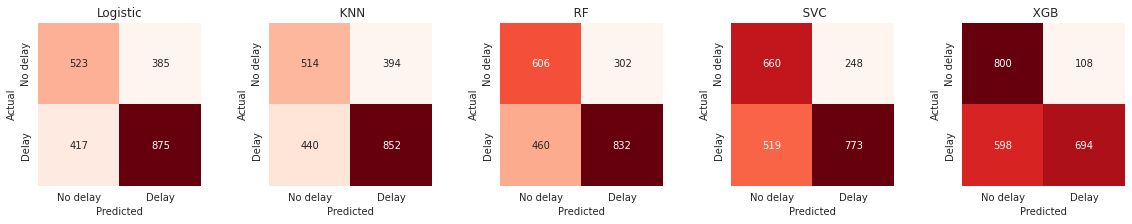

In [123]:
# Confusion matrices
plt.figure(figsize=(20, 3))

for i, name in enumerate(list(models.keys())):
    plt.subplot(1, 5, i + 1)
    sns.heatmap(results[i], annot=True, square=True, cbar=False,
                xticklabels=['No delay', 'Delay'], yticklabels=['No delay', 'Delay'], cmap='Reds', fmt='.0f')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

Research question: 

#1-Does the number of customer calls affect on the shipment being reached on time?

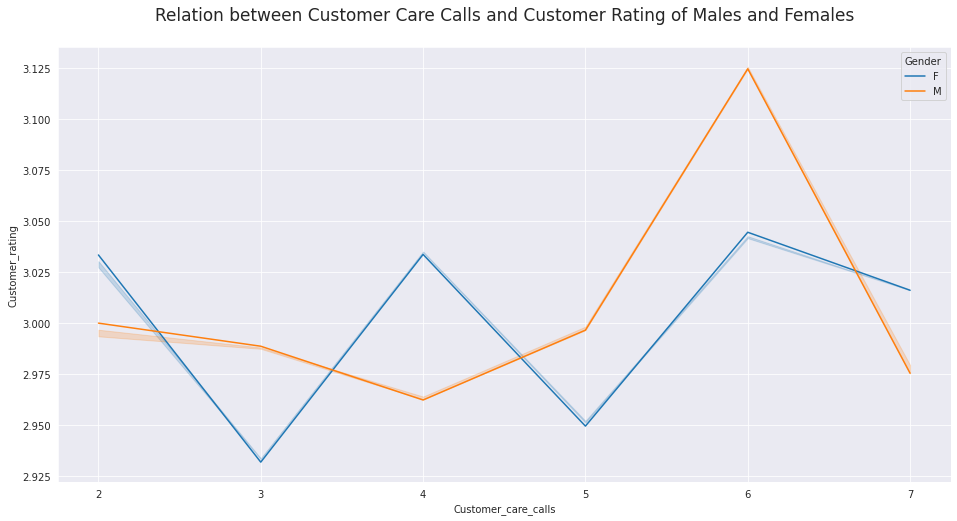

In [145]:
plt.figure(figsize = (16, 8))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = data, ci = 1)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n', fontsize = 17)
plt.show()

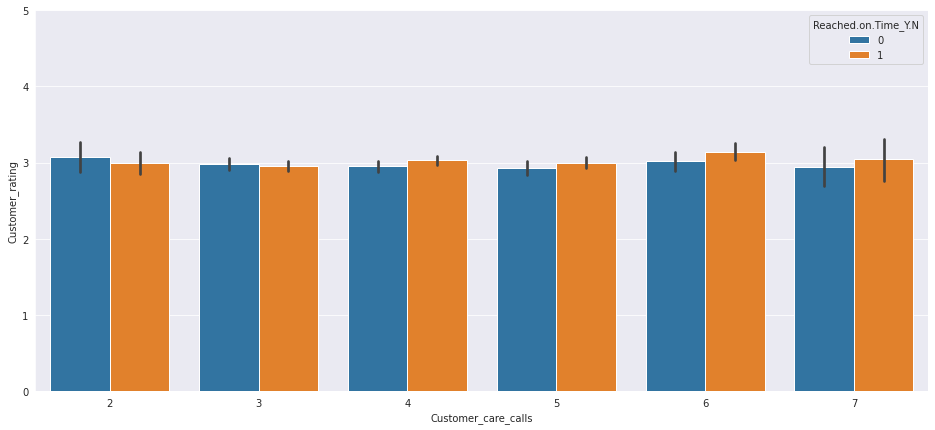

In [147]:
plt.figure(figsize = (16, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = data)
plt.ylim(0, 5)
plt.show()


Yes, when the number of customer calls rises (>= 4), the proportion of shipments that arrive on time increases relative to the proportion of shipments that do not.

This indicates that customer service calls are crucial to getting shipments to customers on time.

#2 What is The Number of Times The Products Stored In Each Warehouse Arrive on time?

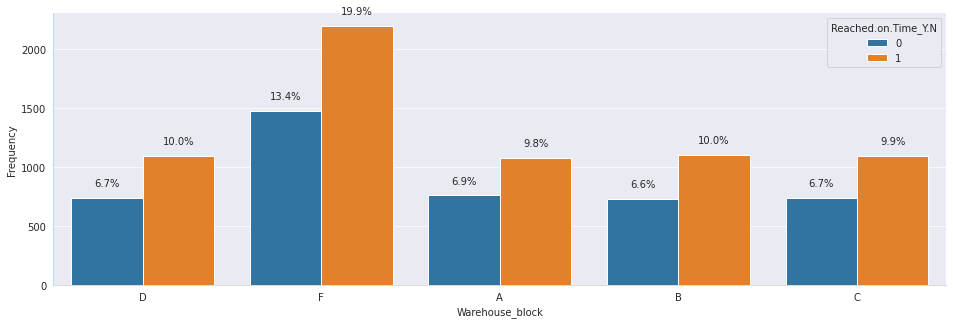

In [150]:
plt.figure(figsize=(16,5))

# plot
total = float(len(data)) 

ax = sns.countplot(x="Warehouse_block", data=data, hue='Reached.on.Time_Y.N');
sns.despine(top=True, right=True, left=False, bottom=False);
ax.spines['left'].set_color('lightblue');
ax.spines['bottom'].set_color('lightgray');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
ax.set_ylabel('Frequency');


The aforementioned graphic demonstrates that shipments' arrival is independent of the warehouse in which they are kept.

#3 What are the factors or attributes that affect the customer rating for the products?

Checking the Customer Rating Correlation:

In [163]:
#Normalize data:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['Mode_of_Shipment'] = encoder.fit_transform(data['Mode_of_Shipment'])
data['Product_importance'] = encoder.fit_transform(data['Product_importance'])
data['Warehouse_block'] = encoder.fit_transform(data['Warehouse_block'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


In [164]:
features=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
          'Cost_of_the_Product', 'Prior_purchases','Product_importance', 
          'Gender','Reached.on.Time_Y.N']
for f in features:
    related = data['Customer_rating'].corr(data[f])
    print("%s: %f" % (f,related))

Warehouse_block: 0.010169
Mode_of_Shipment: 0.001679
Customer_care_calls: 0.012209
Cost_of_the_Product: 0.009270
Prior_purchases: 0.013179
Product_importance: 0.003157
Gender: 0.002775
Reached.on.Time_Y.N: 0.013119


Text(0, 0.5, 'Customer Ratings')

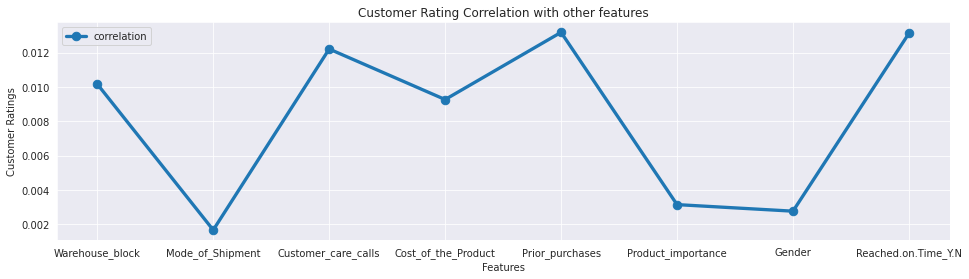

In [166]:
features=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
          'Cost_of_the_Product', 'Prior_purchases','Product_importance', 
          'Gender','Reached.on.Time_Y.N']
correlations = [data['Customer_rating'].corr(data[f]) for f in features ]
features_df = pd.DataFrame({'attributes': features, 'correlation': correlations}) 
features_df.plot(x ='attributes', y='correlation', kind = 'line',
                    figsize=(16,4), title='Customer Rating Correlation with other features',\
                    linewidth=3.3, marker='.', markersize=17)                

plt.xlabel('Features')
plt.ylabel('Customer Ratings')

Text(0, 0.5, 'Customer Ratings')

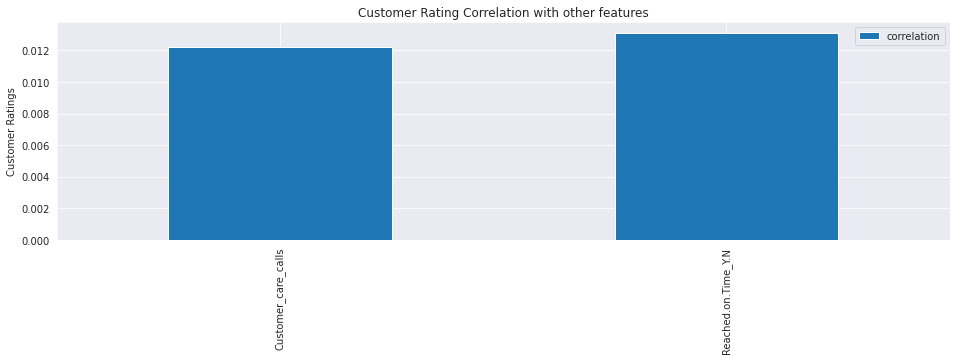

In [168]:
features=["Customer_care_calls","Reached.on.Time_Y.N"]
for f in features:
    related = data['Customer_rating'].corr(data[f])
correlations = [data['Customer_rating'].corr(data[f]) for f in features ]
features_df = pd.DataFrame({'attributes': features, 'correlation': correlations}) 
features_df.plot(x ='attributes', y='correlation', figsize=(16,4), 
                 title='Customer Rating Correlation with other features', kind = 'bar')                
plt.xlabel('')
plt.ylabel('Customer Ratings')

According to the graph above, there is a strong association between the Customer Rating and (Reach on Time, Prior Purchase, Customer Care Calls, cost of Products and Warehouse). Customers who are pleased with these areas (Cost of the product, Custmer care calls, Prior Purchase and being the product reahced on time) are more likely to give it higher ratings. Reached on time and Customer care calls have the greatest impact on ratings.

Additionally, the answer to the first question above indicated that calls to customer service were crucial to getting shipments to customers on schedule.